In [1]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

## make data

In [62]:
t_1 = np.arange(-5,5, 0.01)
a = np.array(list(zip(np.sin(t_1), np.cos(t_1)))) + 2*np.random.random((1000,2))
t_2 = np.arange(0,10, 0.01)
b = 3*np.array(list(zip(np.sin(t_2), np.cos(t_2)))) + 2*np.random.random((1000,2))
b = b[b[:,0]>=0]
a_lable = np.ones((1000,1))
b_lable = np.zeros((len(b),1))
len(b)

736

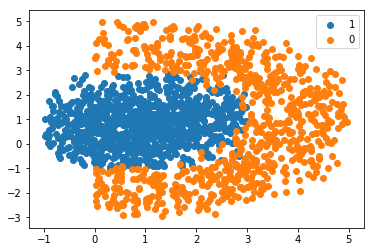

In [63]:
plt.scatter(a[:,0], a[:,1], label='1')
plt.scatter(b[:,0], b[:,1], label='0')
plt.legend()

In [88]:
X = np.vstack((a,b))
y = np.vstack((a_lable,b_lable))

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

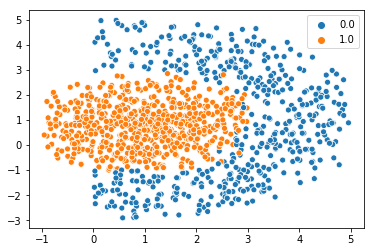

In [96]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train.reshape(1, len(y_train))[0])

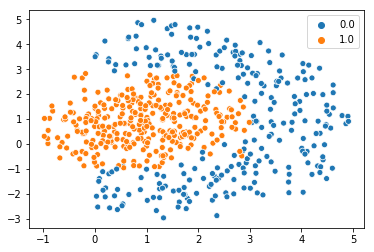

In [97]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.reshape(1, len(y_test))[0])

In [98]:
X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

## simple model

epoch 0, loss 0.31060436367988586  val_loss 0.29819801449775696
epoch 500, loss 0.20045296847820282  val_loss 0.19433847069740295
epoch 1000, loss 0.18156391382217407  val_loss 0.17718705534934998
epoch 1500, loss 0.17281179130077362  val_loss 0.16921305656433105
epoch 2000, loss 0.16814714670181274  val_loss 0.1649569272994995
epoch 2500, loss 0.16538411378860474  val_loss 0.16243703663349152
epoch 3000, loss 0.16361764073371887  val_loss 0.160829558968544
epoch 3500, loss 0.16242291033267975  val_loss 0.1597464680671692
epoch 4000, loss 0.1615796685218811  val_loss 0.15898598730564117
epoch 4500, loss 0.16096438467502594  val_loss 0.15843474864959717
epoch 5000, loss 0.16050338745117188  val_loss 0.15802501142024994


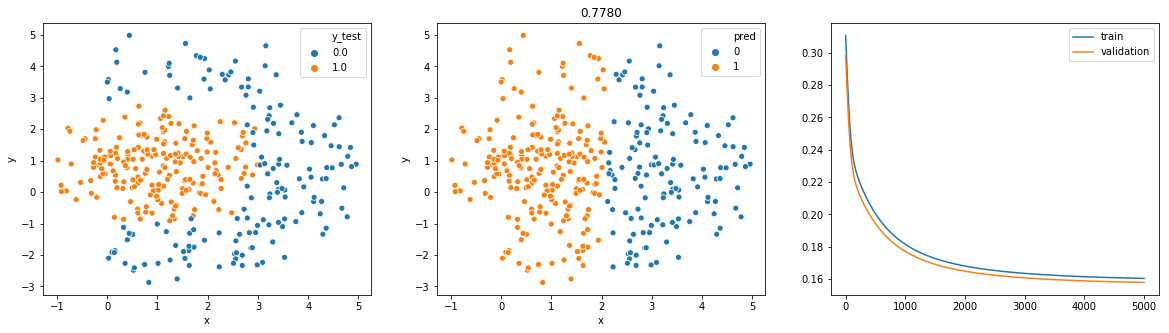

In [125]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=1), 
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

# 2layer model and add Activation function

epoch 0, loss 0.26578018069267273  val_loss 0.26159751415252686
epoch 1000, loss 0.10960814356803894  val_loss 0.11134343594312668
epoch 2000, loss 0.06839903444051743  val_loss 0.0703485831618309
epoch 3000, loss 0.05323566868901253  val_loss 0.0554477721452713
epoch 4000, loss 0.04534846544265747  val_loss 0.047839660197496414
epoch 5000, loss 0.040301308035850525  val_loss 0.04309232532978058
epoch 6000, loss 0.036798715591430664  val_loss 0.03981640934944153
epoch 7000, loss 0.034171056002378464  val_loss 0.03739999234676361
epoch 8000, loss 0.03215457499027252  val_loss 0.0356585718691349
epoch 9000, loss 0.0305329579859972  val_loss 0.034293193370103836
epoch 10000, loss 0.029120508581399918  val_loss 0.03312058001756668


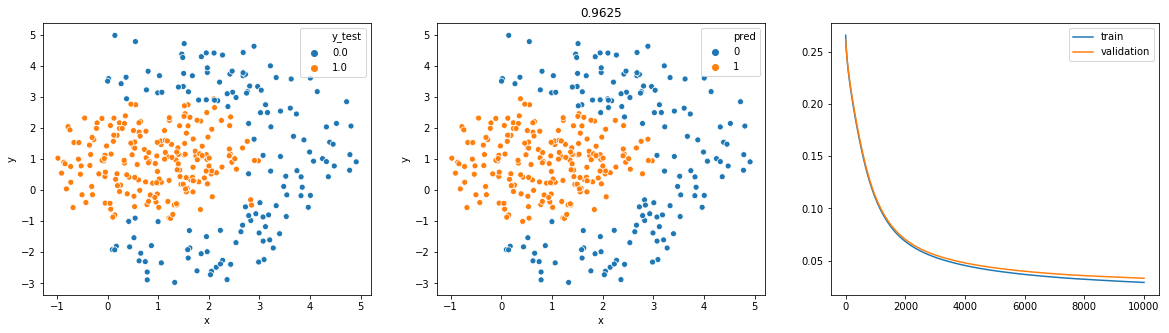

In [138]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=5),
                            nn.ReLU(),
                           nn.Linear(5,1),
                           nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =10001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 1000 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

# cross validation

epoch 0, loss 0.28443214297294617  val_loss 0.2955387532711029
epoch 1000, loss 0.171390563249588  val_loss 0.1753186732530594
epoch 2000, loss 0.12281513959169388  val_loss 0.12404828518629074
epoch 3000, loss 0.07488147914409637  val_loss 0.07097890973091125
epoch 4000, loss 0.058781690895557404  val_loss 0.054619722068309784
epoch 5000, loss 0.050415489822626114  val_loss 0.04631038010120392
epoch 6000, loss 0.045033495873212814  val_loss 0.04091745615005493
epoch 7000, loss 0.04117190092802048  val_loss 0.037038497626781464
epoch 8000, loss 0.038265716284513474  val_loss 0.03425386920571327
epoch 9000, loss 0.03596983850002289  val_loss 0.032118525356054306
epoch 10000, loss 0.03410550206899643  val_loss 0.030445003882050514


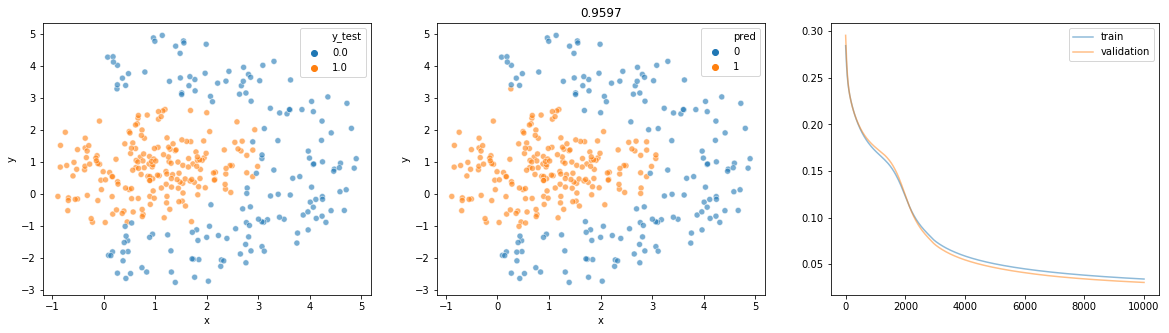

epoch 0, loss 0.2794308364391327  val_loss 0.2784208655357361
epoch 1000, loss 0.1594601571559906  val_loss 0.16056784987449646
epoch 2000, loss 0.09165327996015549  val_loss 0.09521032124757767
epoch 3000, loss 0.06645140796899796  val_loss 0.07120254635810852
epoch 4000, loss 0.0552249401807785  val_loss 0.060359448194503784
epoch 5000, loss 0.049135446548461914  val_loss 0.05438307672739029
epoch 6000, loss 0.045382097363471985  val_loss 0.05068525671958923
epoch 7000, loss 0.042900312691926956  val_loss 0.04830840229988098
epoch 8000, loss 0.0411296971142292  val_loss 0.04660053551197052
epoch 9000, loss 0.03981395065784454  val_loss 0.045324090868234634
epoch 10000, loss 0.038796596229076385  val_loss 0.04430781304836273


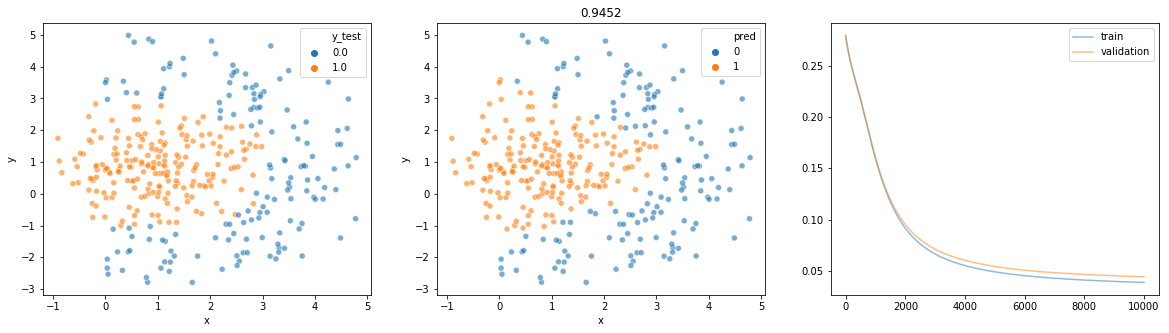

epoch 0, loss 0.2606107294559479  val_loss 0.2654842436313629
epoch 1000, loss 0.18180252611637115  val_loss 0.18798445165157318
epoch 2000, loss 0.1328461617231369  val_loss 0.13514843583106995
epoch 3000, loss 0.09399620443582535  val_loss 0.09615860879421234
epoch 4000, loss 0.07089198380708694  val_loss 0.07379225641489029
epoch 5000, loss 0.05811290070414543  val_loss 0.06122211739420891
epoch 6000, loss 0.050661176443099976  val_loss 0.05340882018208504
epoch 7000, loss 0.04583665356040001  val_loss 0.04840424656867981
epoch 8000, loss 0.042568307369947433  val_loss 0.04474804550409317
epoch 9000, loss 0.040222566574811935  val_loss 0.04208918660879135
epoch 10000, loss 0.03843681886792183  val_loss 0.0400540754199028


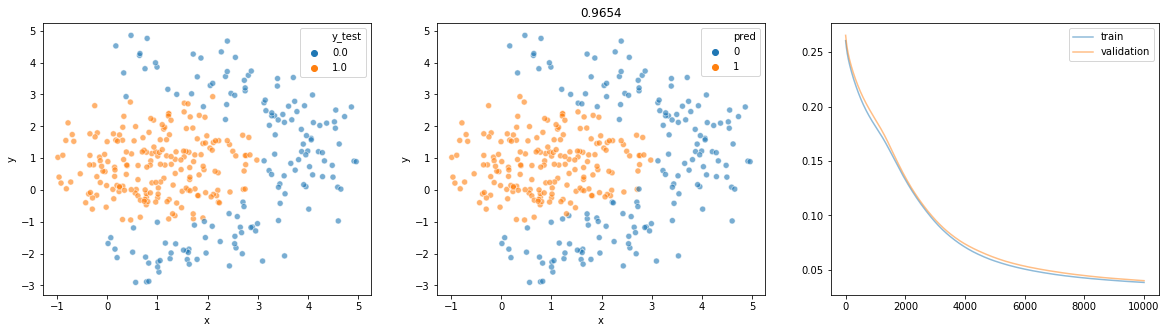

epoch 0, loss 0.2663034498691559  val_loss 0.2821871340274811
epoch 1000, loss 0.16345493495464325  val_loss 0.1701311618089676
epoch 2000, loss 0.09555886685848236  val_loss 0.10043422877788544
epoch 3000, loss 0.06407114118337631  val_loss 0.07007855921983719
epoch 4000, loss 0.05045176297426224  val_loss 0.05726315826177597
epoch 5000, loss 0.0432092510163784  val_loss 0.05066891387104988
epoch 6000, loss 0.03866187110543251  val_loss 0.04663486033678055
epoch 7000, loss 0.03550976514816284  val_loss 0.04387063533067703
epoch 8000, loss 0.033210329711437225  val_loss 0.041803568601608276
epoch 9000, loss 0.031453829258680344  val_loss 0.040221672505140305
epoch 10000, loss 0.030067358165979385  val_loss 0.03886839374899864


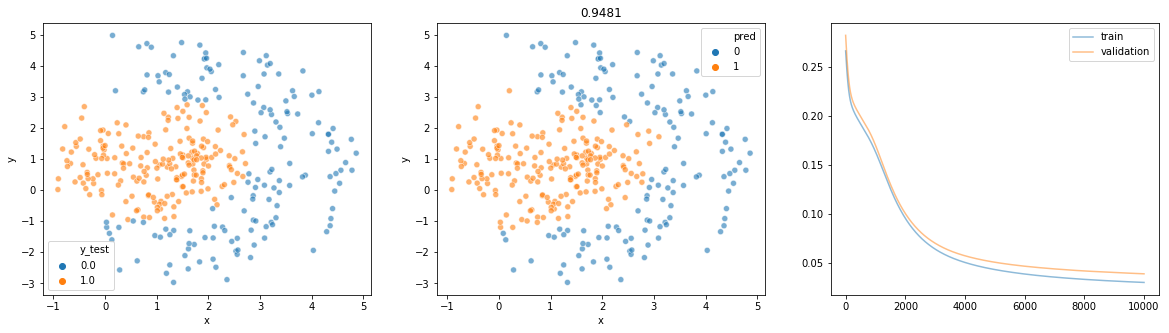

epoch 0, loss 0.2551608681678772  val_loss 0.2554765045642853
epoch 1000, loss 0.1326206624507904  val_loss 0.13193483650684357
epoch 2000, loss 0.0843471959233284  val_loss 0.08018423616886139
epoch 3000, loss 0.06428365409374237  val_loss 0.059140339493751526
epoch 4000, loss 0.05454973876476288  val_loss 0.04959830641746521
epoch 5000, loss 0.049007728695869446  val_loss 0.04420022666454315
epoch 6000, loss 0.045435138046741486  val_loss 0.04081156477332115
epoch 7000, loss 0.04289638251066208  val_loss 0.03846471384167671
epoch 8000, loss 0.040875256061553955  val_loss 0.036576300859451294
epoch 9000, loss 0.03916045278310776  val_loss 0.03495510667562485
epoch 10000, loss 0.03761201351881027  val_loss 0.033501699566841125


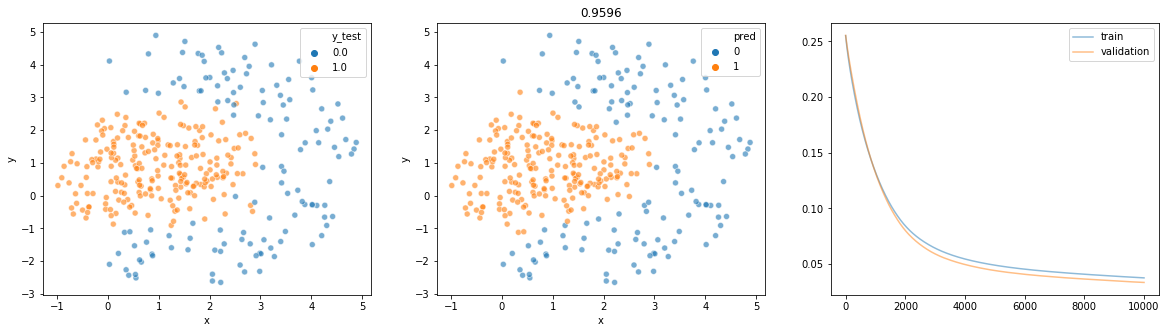

In [139]:
for trn_indx, val_indx in k.split(X):
    X_train = X[trn_indx,:]
    X_test = X[val_indx,:]
    y_train = y[trn_indx]
    y_test = y[val_indx]
    
    X_train = torch.from_numpy(X_train) .float() 
    X_test = torch.from_numpy(X_test) .float() 
    y_train = torch.from_numpy(y_train) .float() 
    y_test = torch.from_numpy(y_test) .float() 
    
    
    model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=5),
                            nn.ReLU(),
                           nn.Linear(5,1),
                           nn.Sigmoid())
    
    model = model.train()
    mse = nn.MSELoss()
    learning_rate = 0.02  
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
    loss_list = []
    loss_val_list = []
    iteration_number =10001
    for iteration in range(iteration_number):

        # optimization
        optimizer.zero_grad() 

        # Forward to get output
        results = model(X_train)
        # Calculate Loss
        loss = mse(results.squeeze(), y_train.squeeze())

        # backward propagation
        loss.backward()

        # Updating parameters
        optimizer.step()

        # store loss
        loss_list.append(loss.data)
        pred = model(X_test)
        loss_val = mse(pred.squeeze(), y_test.squeeze())
        loss_val_list.append(loss_val)
        # print loss
        if(iteration % 1000 == 0):
            print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))

            
    model = model.eval()
    pred = model(X_test).squeeze().tolist()
    for i, p in enumerate(pred):
        if p>0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
    df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.scatterplot(data=df, x='x', y='y', hue='y_test', alpha=0.6)
    plt.subplot(1,3,2)
    sns.scatterplot(data=df, x='x', y='y', hue='pred', alpha=0.6)
    plt.title(str((df.pred==df.y_test).mean())[:6])
    plt.subplot(1,3,3)
    plt.plot(loss_list, label='train', alpha=0.5)
    plt.plot(loss_val_list, label='validation', alpha=0.5)
    plt.legend()
    plt.show()

### more deep

epoch 0, loss 0.2600705921649933  val_loss 0.25707143545150757
epoch 500, loss 0.24111904203891754  val_loss 0.2454976737499237
epoch 1000, loss 0.2388148456811905  val_loss 0.24400468170642853
epoch 1500, loss 0.22917857766151428  val_loss 0.23267793655395508
epoch 2000, loss 0.21800856292247772  val_loss 0.22041140496730804
epoch 2500, loss 0.19179119169712067  val_loss 0.19627410173416138
epoch 3000, loss 0.18136808276176453  val_loss 0.18716996908187866
epoch 3500, loss 0.16092437505722046  val_loss 0.1701386719942093
epoch 4000, loss 0.13303355872631073  val_loss 0.15068767964839935
epoch 4500, loss 0.12571851909160614  val_loss 0.13149598240852356
epoch 5000, loss 0.11044031381607056  val_loss 0.10750147700309753


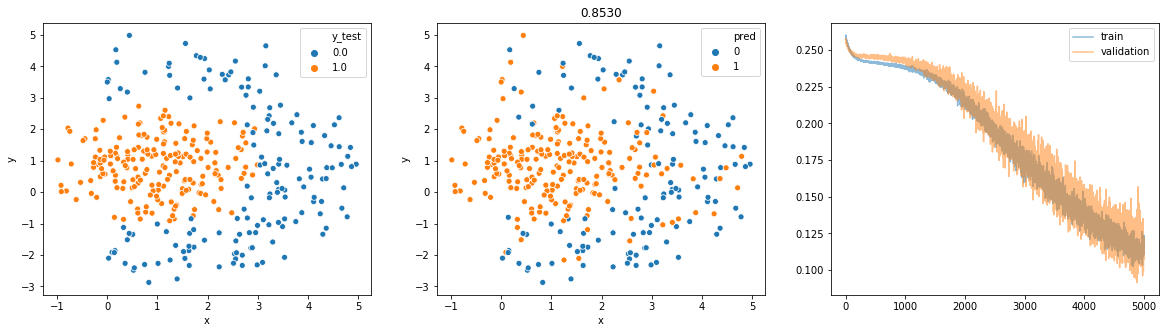

In [129]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test', alpha=0.6)
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred', alpha=0.6)
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train', alpha=0.5)
plt.plot(loss_val_list, label='validation', alpha=0.5)
plt.legend()
plt.show()

## more deep model

epoch 0, loss 0.2573755979537964  val_loss 0.25442537665367126
epoch 500, loss 0.24310357868671417  val_loss 0.247963085770607
epoch 1000, loss 0.2410804033279419  val_loss 0.24658232927322388
epoch 1500, loss 0.2318340539932251  val_loss 0.2339325100183487
epoch 2000, loss 0.20169402658939362  val_loss 0.22019843757152557
epoch 2500, loss 0.1529528647661209  val_loss 0.13629931211471558
epoch 3000, loss 0.10282102972269058  val_loss 0.12816289067268372
epoch 3500, loss 0.09465763717889786  val_loss 0.10011724382638931
epoch 4000, loss 0.07781686633825302  val_loss 0.09924980252981186
epoch 4500, loss 0.07099128514528275  val_loss 0.08538442850112915
epoch 5000, loss 0.07004646956920624  val_loss 0.07402306795120239


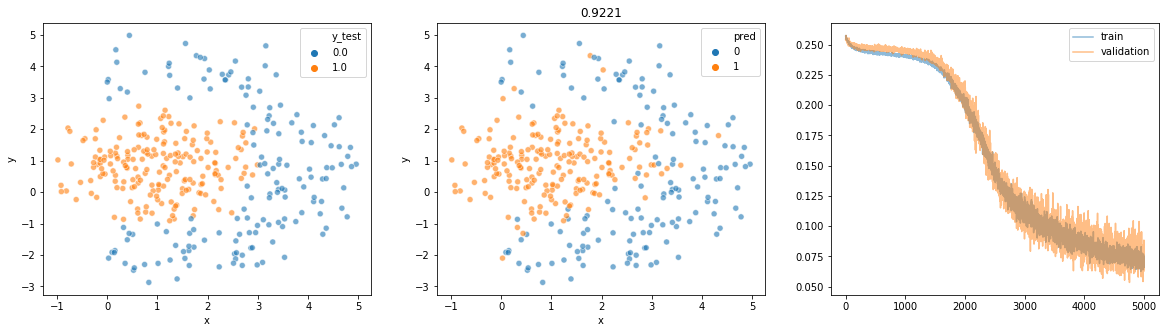

In [130]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 10),
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 10),
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.Linear(10, 1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =10001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 1000 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test', alpha=0.6)
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred', alpha=0.6)
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train', alpha=0.5)
plt.plot(loss_val_list, label='validation', alpha=0.5)
plt.legend()
plt.show()

## cross validation

In [131]:
from sklearn.model_selection import  KFold

In [132]:
k = KFold(5, shuffle=True)

epoch 0, loss 0.24331918358802795  val_loss 0.2518637478351593
epoch 1000, loss 0.1899932324886322  val_loss 0.18357177078723907
epoch 2000, loss 0.15263314545154572  val_loss 0.13936582207679749
epoch 3000, loss 0.11531710624694824  val_loss 0.11153531074523926
epoch 4000, loss 0.10269806534051895  val_loss 0.09745590388774872
epoch 5000, loss 0.07520350813865662  val_loss 0.09651153534650803
epoch 6000, loss 0.06679285317659378  val_loss 0.07629114389419556
epoch 7000, loss 0.06522391736507416  val_loss 0.08247041702270508
epoch 8000, loss 0.06260686367750168  val_loss 0.07616010308265686
epoch 9000, loss 0.05222611501812935  val_loss 0.06917013227939606
epoch 10000, loss 0.05218968540430069  val_loss 0.052856333553791046


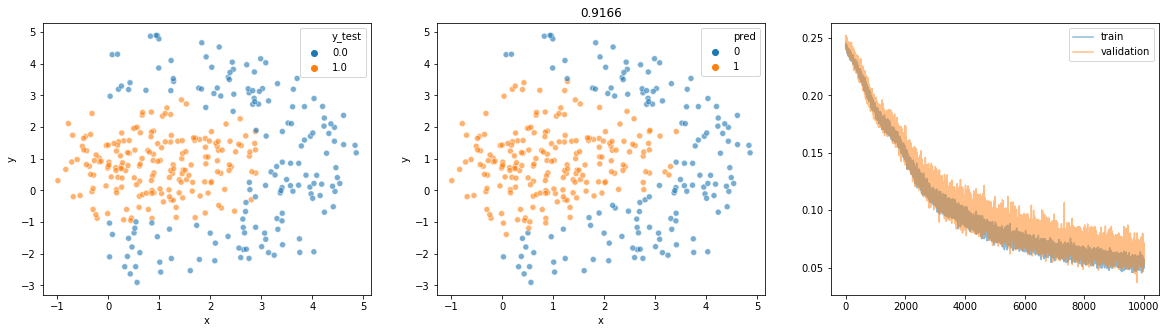

epoch 0, loss 0.25968611240386963  val_loss 0.26418009400367737
epoch 1000, loss 0.18156085908412933  val_loss 0.1717851161956787
epoch 2000, loss 0.12972016632556915  val_loss 0.13084058463573456
epoch 3000, loss 0.10301294177770615  val_loss 0.1006569117307663
epoch 4000, loss 0.08408056944608688  val_loss 0.08293315023183823
epoch 5000, loss 0.08026159554719925  val_loss 0.08652996271848679
epoch 6000, loss 0.07143568992614746  val_loss 0.0746818259358406
epoch 7000, loss 0.06370746344327927  val_loss 0.0659380555152893
epoch 8000, loss 0.06761309504508972  val_loss 0.06050221249461174
epoch 9000, loss 0.05817461386322975  val_loss 0.06562308222055435
epoch 10000, loss 0.061813537031412125  val_loss 0.04480490833520889


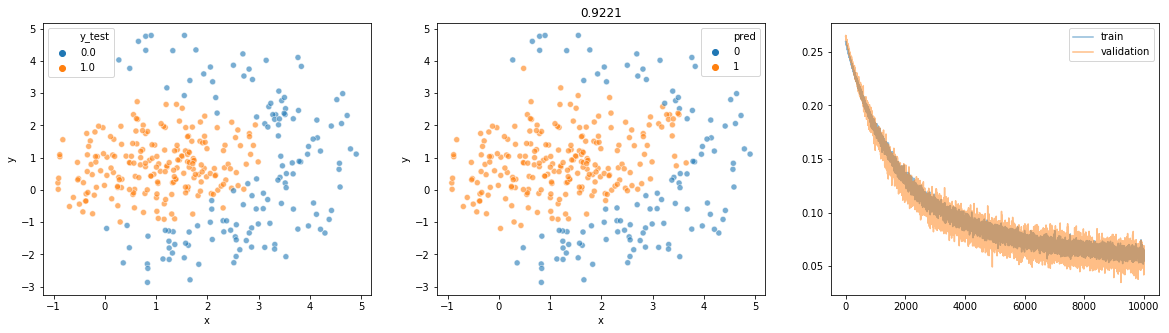

epoch 0, loss 0.25385892391204834  val_loss 0.25397706031799316
epoch 1000, loss 0.20842820405960083  val_loss 0.2127159833908081
epoch 2000, loss 0.16283582150936127  val_loss 0.172328382730484
epoch 3000, loss 0.13093441724777222  val_loss 0.13641831278800964
epoch 4000, loss 0.11267542839050293  val_loss 0.1159164234995842
epoch 5000, loss 0.10192509740591049  val_loss 0.08078321069478989
epoch 6000, loss 0.09189780056476593  val_loss 0.08310678601264954
epoch 7000, loss 0.08049134165048599  val_loss 0.07233493030071259
epoch 8000, loss 0.07164577394723892  val_loss 0.06493246555328369
epoch 9000, loss 0.07032045722007751  val_loss 0.08607962727546692
epoch 10000, loss 0.07361271232366562  val_loss 0.07601126283407211


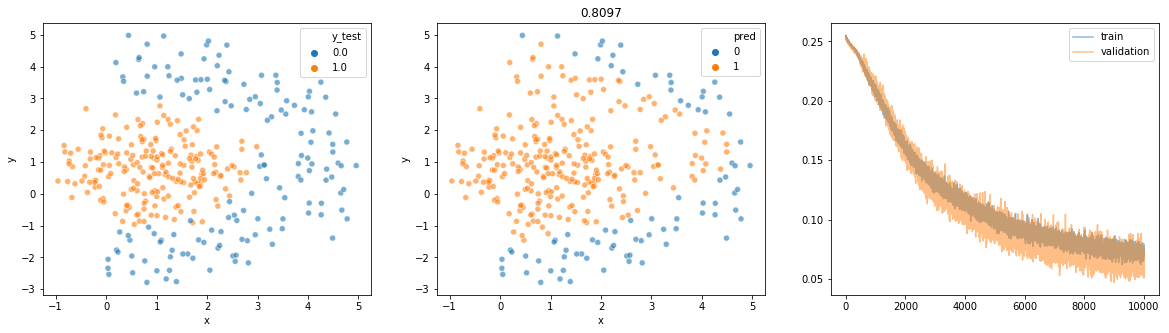

epoch 0, loss 0.24197977781295776  val_loss 0.24361662566661835
epoch 1000, loss 0.1749037504196167  val_loss 0.1764908879995346
epoch 2000, loss 0.12301956117153168  val_loss 0.11747395992279053
epoch 3000, loss 0.092463918030262  val_loss 0.09504163265228271
epoch 4000, loss 0.08422613888978958  val_loss 0.07656974345445633
epoch 5000, loss 0.0702228993177414  val_loss 0.08172611892223358
epoch 6000, loss 0.06824825704097748  val_loss 0.06605246663093567
epoch 7000, loss 0.06854573637247086  val_loss 0.06951497495174408
epoch 8000, loss 0.060649655759334564  val_loss 0.05992203578352928
epoch 9000, loss 0.0621364489197731  val_loss 0.0619199201464653
epoch 10000, loss 0.060881342738866806  val_loss 0.052045926451683044


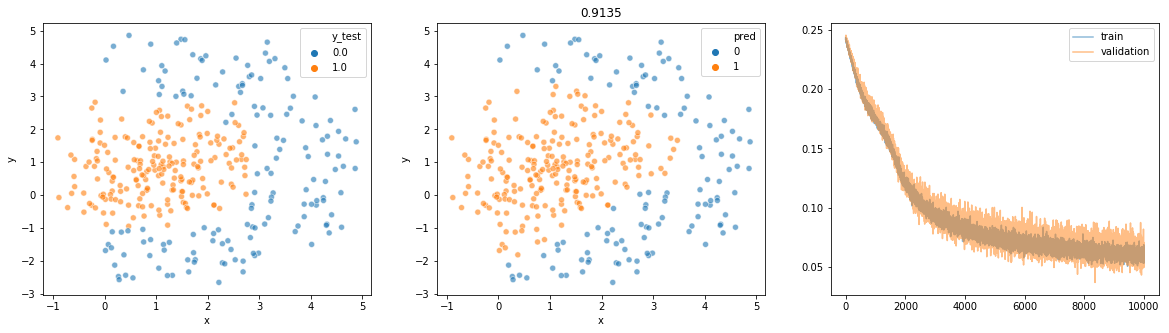

epoch 0, loss 0.23311197757720947  val_loss 0.2330566644668579
epoch 1000, loss 0.19117183983325958  val_loss 0.1936553567647934
epoch 2000, loss 0.16997727751731873  val_loss 0.17332172393798828
epoch 3000, loss 0.13602688908576965  val_loss 0.13056321442127228
epoch 4000, loss 0.09889989346265793  val_loss 0.10299333930015564
epoch 5000, loss 0.08928139507770538  val_loss 0.09944969415664673
epoch 6000, loss 0.08098252862691879  val_loss 0.08143981546163559
epoch 7000, loss 0.07025071233510971  val_loss 0.06817198544740677
epoch 8000, loss 0.0675361230969429  val_loss 0.06614988297224045
epoch 9000, loss 0.06290949136018753  val_loss 0.067984938621521
epoch 10000, loss 0.056301992386579514  val_loss 0.06975845992565155


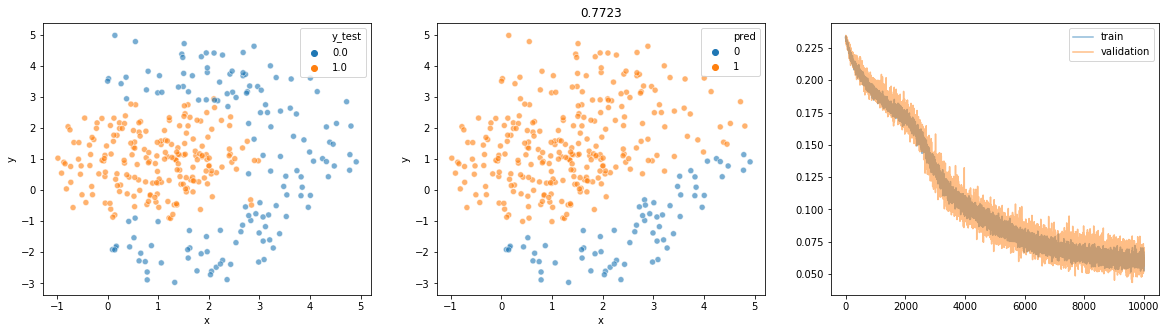

In [135]:
for trn_indx, val_indx in k.split(X):
    X_train = X[trn_indx,:]
    X_test = X[val_indx,:]
    y_train = y[trn_indx]
    y_test = y[val_indx]
    
    X_train = torch.from_numpy(X_train) .float() 
    X_test = torch.from_numpy(X_test) .float() 
    y_train = torch.from_numpy(y_train) .float() 
    y_test = torch.from_numpy(y_test) .float() 
    
    model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,5),
                            nn.ReLU(),
                            nn.Linear(5,5),
                            nn.ReLU(),
                            nn.Linear(5,1),
                            nn.Sigmoid())
    
    model = model.train()
    mse = nn.MSELoss()
    learning_rate = 0.02  
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
    loss_list = []
    loss_val_list = []
    iteration_number =10001
    for iteration in range(iteration_number):

        # optimization
        optimizer.zero_grad() 

        # Forward to get output
        results = model(X_train)
        # Calculate Loss
        loss = mse(results.squeeze(), y_train.squeeze())

        # backward propagation
        loss.backward()

        # Updating parameters
        optimizer.step()

        # store loss
        loss_list.append(loss.data)
        pred = model(X_test)
        loss_val = mse(pred.squeeze(), y_test.squeeze())
        loss_val_list.append(loss_val)
        # print loss
        if(iteration % 1000 == 0):
            print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))

            
    model = model.eval()
    pred = model(X_test).squeeze().tolist()
    for i, p in enumerate(pred):
        if p>0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
    df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.scatterplot(data=df, x='x', y='y', hue='y_test', alpha=0.6)
    plt.subplot(1,3,2)
    sns.scatterplot(data=df, x='x', y='y', hue='pred', alpha=0.6)
    plt.title(str((df.pred==df.y_test).mean())[:6])
    plt.subplot(1,3,3)
    plt.plot(loss_list, label='train', alpha=0.5)
    plt.plot(loss_val_list, label='validation', alpha=0.5)
    plt.legend()
    plt.show()